In [33]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [34]:
# Load the data
data = pd.read_csv('E:\Python Projects\stocks.csv')

In [35]:
#Exploring dataset
data.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [36]:
data.shape

(248, 8)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-null    float64
 6   Adj Close  248 non-null    float64
 7   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 15.6+ KB


In [38]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
mean,215.252093,217.919662,212.697452,215.381674,215.362697,3.208210e+07
std,91.691315,92.863023,90.147881,91.461989,91.454750,2.233590e+07
min,89.540001,90.129997,88.860001,89.349998,89.349998,2.657900e+06
25%,135.235004,137.440004,134.822495,136.347498,136.347498,1.714180e+07
50%,208.764999,212.614998,208.184998,209.920006,209.920006,2.734000e+07
75%,304.177505,307.565002,295.437500,303.942505,303.942505,4.771772e+07
max,372.410004,373.829987,361.739990,366.829987,366.829987,1.133164e+08


In [39]:
#Checking for missing values
data.isnull().sum()

Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

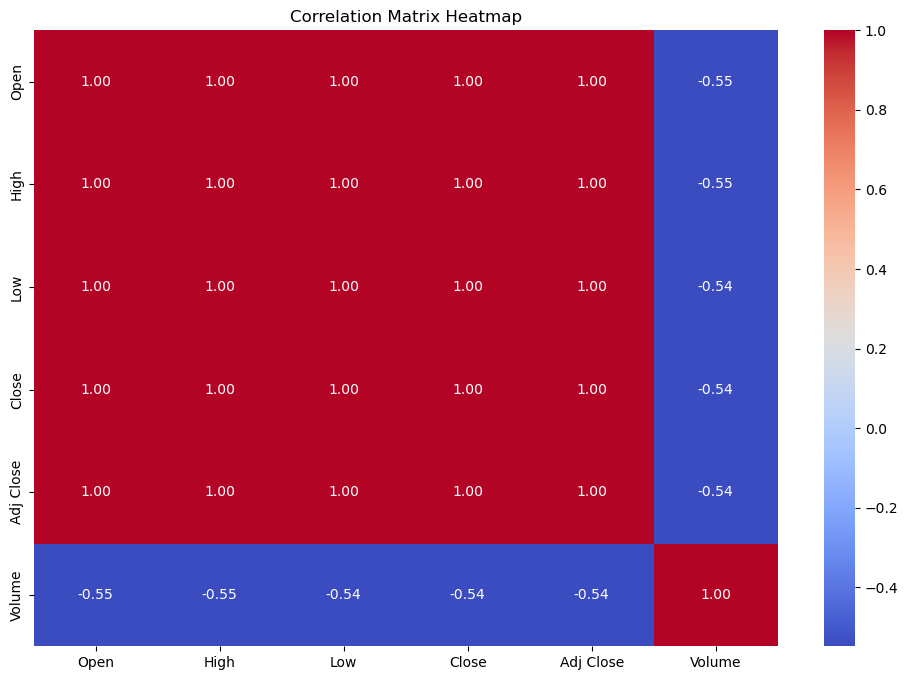

In [40]:
# 1. CORRELATION ANALYSIS
plt.figure(figsize = (12,8))
correlation_matrix = data.corr(numeric_only = True)
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


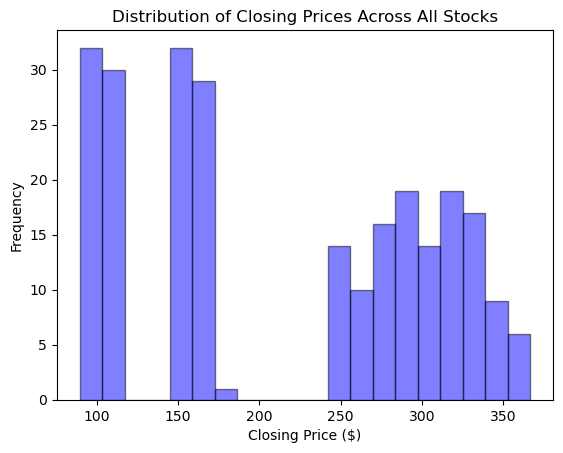

In [41]:
# 2. CLOSING PRICE DISTRIBUTION
plt.hist(data['Close'], bins=20, alpha = 0.5, color = 'blue' , edgecolor = 'black')
plt.xlabel('Closing Price ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Closing Prices Across All Stocks')
plt.show()


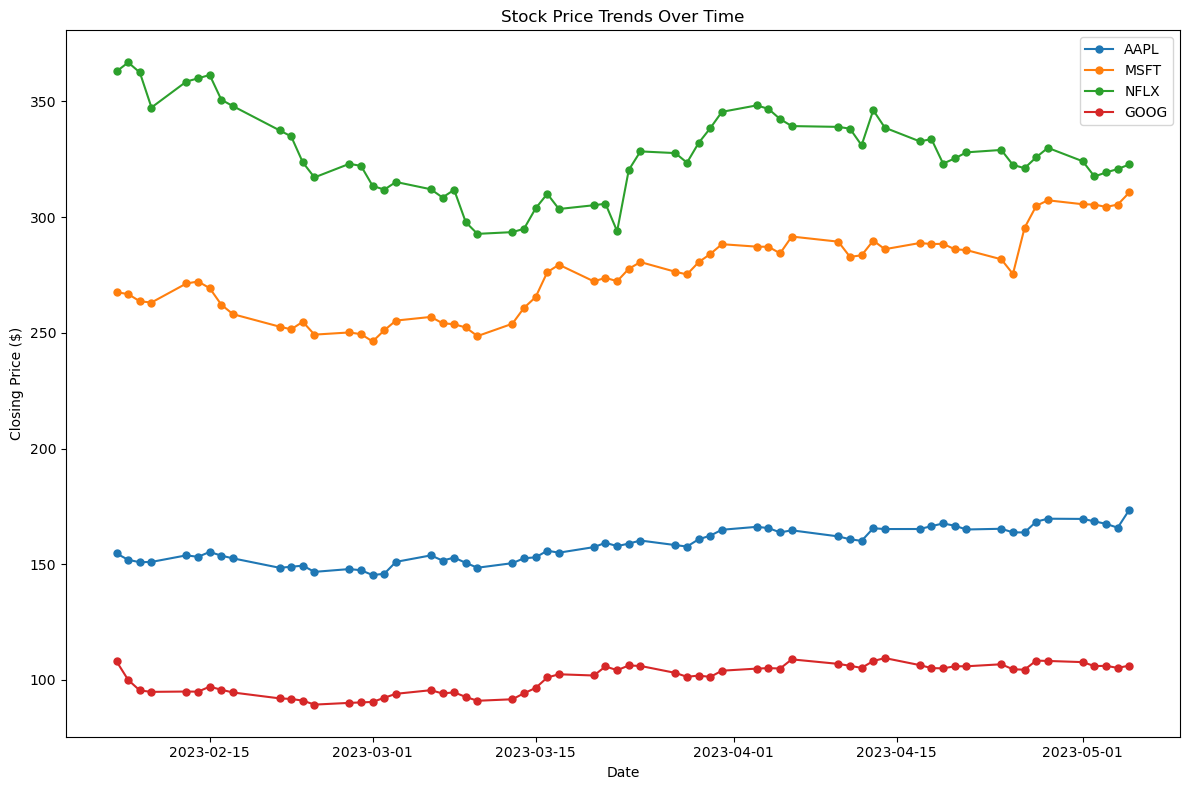

In [42]:
# 3. STOCK PRICE COMPARISON BY COMPANY
data['Date'] = pd.to_datetime(data['Date'])
plt.figure(figsize=(12, 8))
for ticker in data['Ticker'].unique():
    company_data = data[data['Ticker'] == ticker]
    plt.plot(company_data['Date'], company_data['Close'], marker = 'o', markersize = 5, label = ticker)

plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.title('Stock Price Trends Over Time')
plt.legend()
plt.tight_layout()
plt.show()


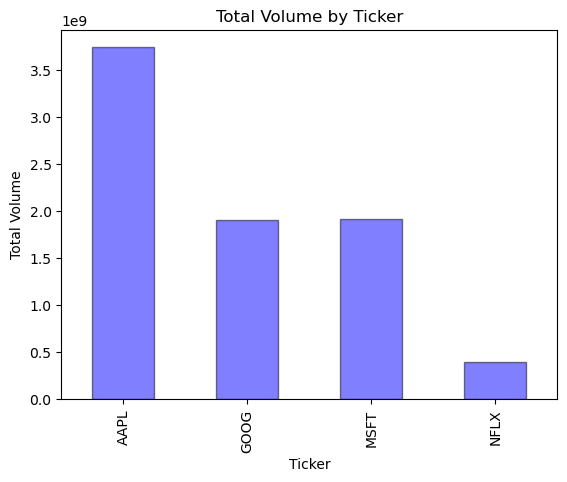

In [43]:
# 4. VOLUME ANALYSIS
ticker_volume = data.groupby('Ticker')['Volume'].sum()
ticker_volume.plot(kind = 'bar', alpha = 0.5, color = 'blue' , edgecolor = 'black')
plt.xlabel('Ticker')
plt.ylabel('Total Volume')
plt.title('Total Volume by Ticker')
plt.show()

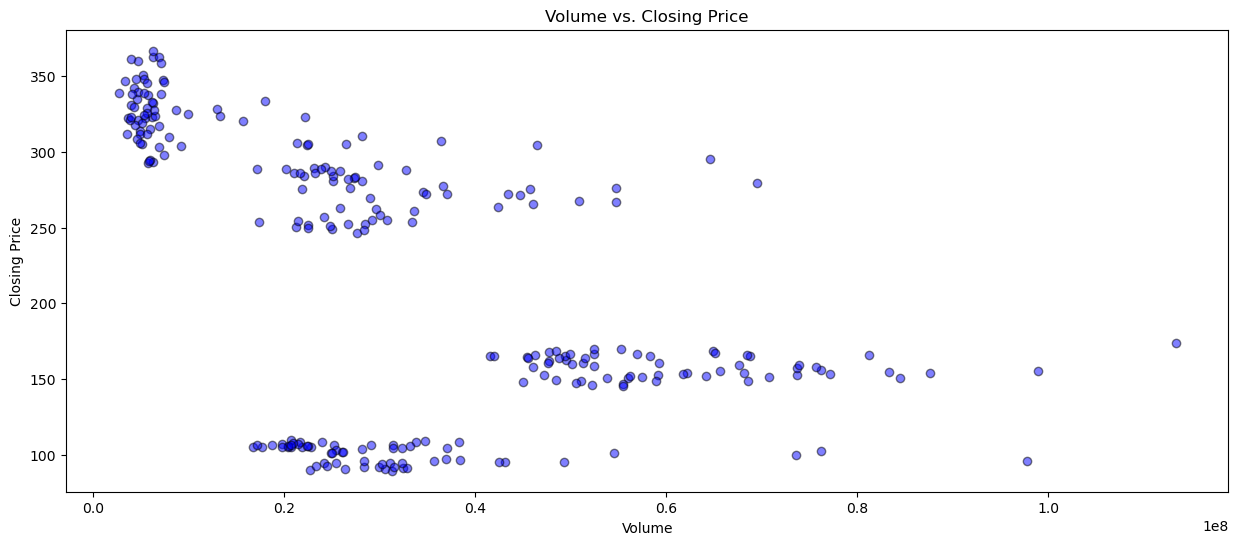

In [44]:
# 5. Scatter Plot
plt.figure(figsize=(15,6))
plt.scatter(data['Volume'], data['Close'], alpha = 0.5, color = 'blue', edgecolor = 'black')
plt.xlabel('Volume')
plt.ylabel('Closing Price')
plt.title('Volume vs. Closing Price')
plt.show()

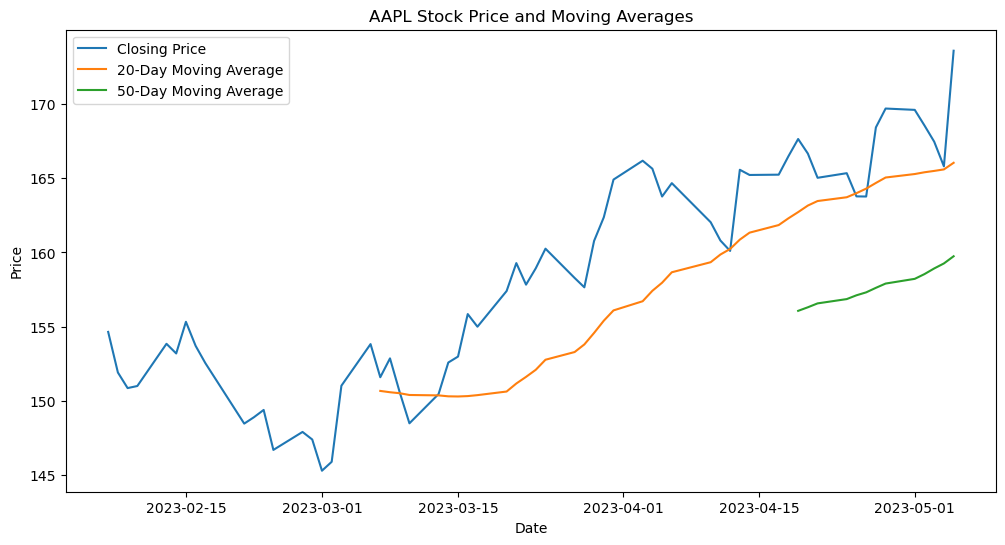

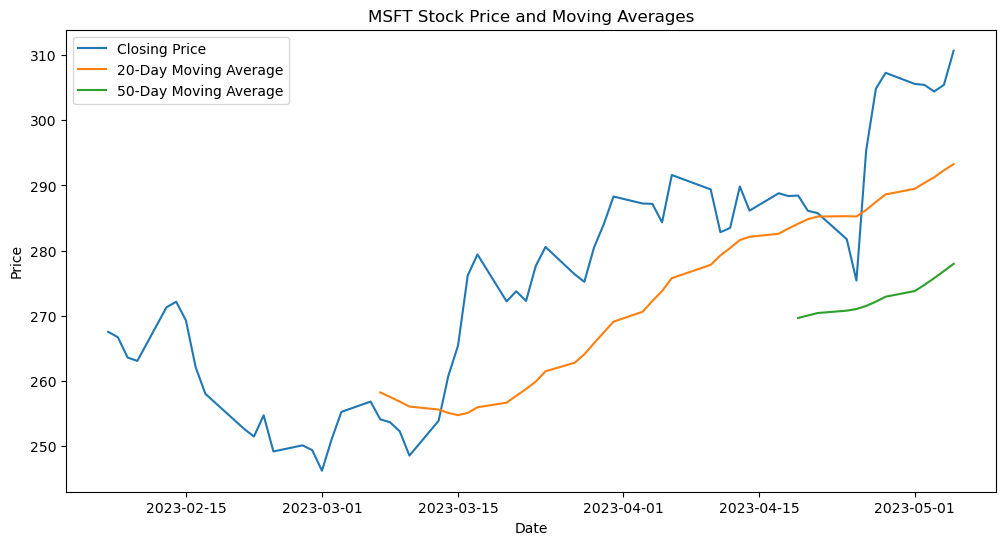

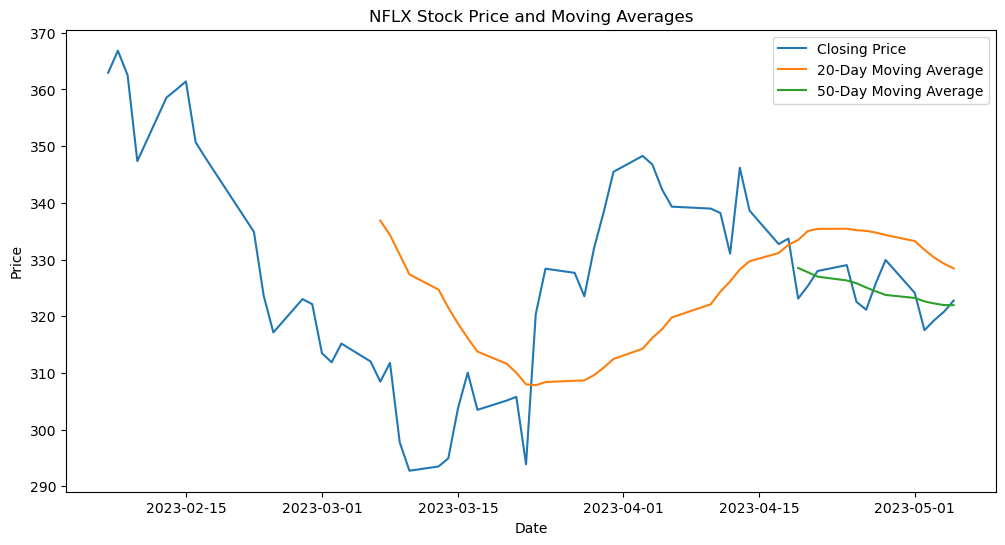

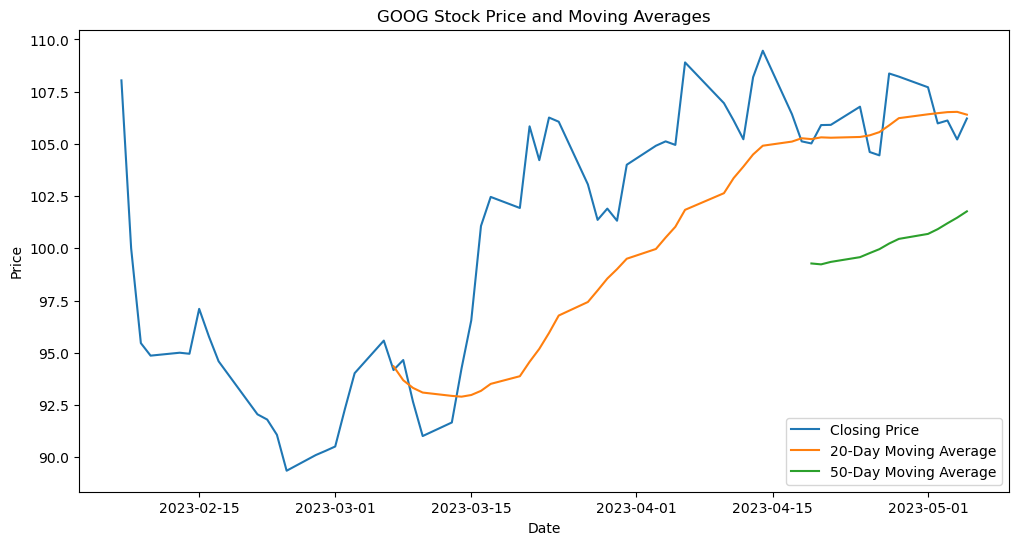

In [45]:
# This ensures 'Date' is a column again.
data.reset_index(inplace=True)

# Now, set the 'Date' column as the index for time-series operations
data.set_index('Date', inplace=True)

# Plot moving averages for each stock
for ticker in data['Ticker'].unique():
    ticker_data = data[data['Ticker'] == ticker].copy()
    
    # Calculate 20-day and 50-day moving averages
    ticker_data['20_Day_MA'] = ticker_data['Close'].rolling(window=20).mean()
    ticker_data['50_Day_MA'] = ticker_data['Close'].rolling(window=50).mean()

    # Create the plot using the index (which is now 'Date')
    plt.figure(figsize=(12, 6))
    plt.plot(ticker_data.index, ticker_data['Close'], label='Closing Price')
    plt.plot(ticker_data.index, ticker_data['20_Day_MA'], label='20-Day Moving Average')
    plt.plot(ticker_data.index, ticker_data['50_Day_MA'], label='50-Day Moving Average')
    plt.title(f'{ticker} Stock Price and Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()





In [46]:
# Reset the index again to make 'Ticker' a column for the groupby operation
data.reset_index(inplace=True)

# Calculate volatility
daily_returns = data.groupby('Ticker')['Close'].pct_change()
volatility = daily_returns.groupby(data['Ticker']).std()

print("\nVolatility (Standard Deviation of Daily Returns):")
print(volatility)


Volatility (Standard Deviation of Daily Returns):
Ticker
AAPL    0.014152
GOOG    0.020710
MSFT    0.017881
NFLX    0.022481
Name: Close, dtype: float64
